# Antisymmetric with mutation test

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import island_evo_simulation_methods as ie
from scipy.stats import norm
plt.style.use('researchfigs')

In [2]:
plt.style.use('researchfigs')

In this notebook we test the functions for mutational dynamics. Mutants are introduced on a timescale
of order $K^{1/2}M$, such that the system roughly "equilibrates", with most of the "deterministic"
extinctions having already occured.

In [3]:
D = 15
K = 40
M = 20
thresh = -4.*M
inv_fac = np.exp(5.)
dt = 0.1
mu = 5
epoch_timescale = 3.
epoch_num = 200
sample_num = 20
gamma = -0.9

file_name = 'antisym_evo_test_0'


In [4]:
seed = 100

ie.AntisymEvo(file_name, D, K, M, gamma, thresh, inv_fac, dt, mu, seed, epoch_timescale, epoch_num, sample_num)

/home/atish/Dropbox/Ecology/Bacteria phage code/island-evo/island_evo_simulation_methods.py:1194: RuntimeWarning: divide by zero encountered in true_divide
  temp_rats = np.divide(nbar, n0)  # remove infinities
/home/atish/Dropbox/Ecology/Bacteria phage code/island-evo/island_evo_simulation_methods.py:1194: RuntimeWarning: invalid value encountered in true_divide
  temp_rats = np.divide(nbar, n0)  # remove infinities


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201


In [5]:
with np.load(file_name+'.npz') as data:
    exp_data = data['class_obj'].item()


In [6]:
exp_data.keys()

dict_keys(['file_name', 'D', 'K', 'M', 'gamma', 'thresh', 'inv_fac', 'epoch_timescale', 'epoch_num', 'dt', 'mu', 'seed', 'sample_num', 'N', 'm', 'K_tot', 'V', 'increment', 'dt_list', 'epoch_time_list', 'eta_list', 'n_init_list', 'n_mean_ave_list', 'n2_mean_ave_list', 'n_cross_mean_list', 'mig_mean_list', 'eta_mean_list', 'lambda_mean_ave_list', 'n_mean_std_list', 'n2_mean_std_list', 'lambda_mean_std_list', 'extinct_time_array', 'n_alive', 'n_traj_eq', 'n_traj_f'])

We can push ourselves into a regime where the number of types is increasing with time. Note that the number
of types increases only sublinearly, in part due to the fact that the mutation rate is itself slowing down.

Text(0.5,1,'Number of types vs. epoch, $\\mu = 5$')

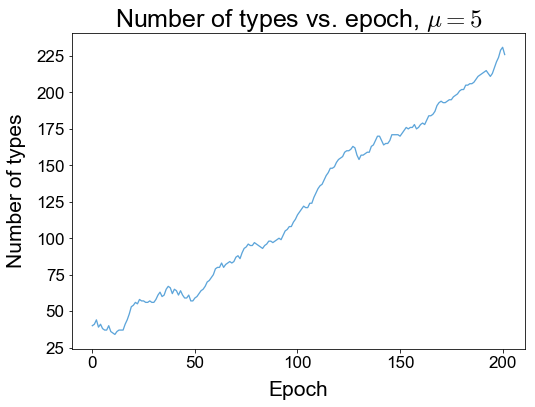

In [7]:
plt.figure()
plt.plot(np.sum(exp_data['n_alive'],axis=0))
plt.xlabel('Epoch')
plt.ylabel('Number of types')
plt.title('Number of types vs. epoch, $\mu = {}$'.format(exp_data['mu']))

Text(0.5,0,'Epoch')

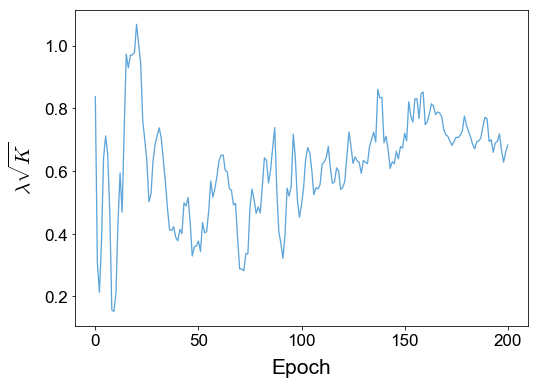

In [8]:
plt.figure()
plt.plot(exp_data['lambda_mean_ave_list']*np.sqrt(np.sum(exp_data['n_alive'][:,1:],axis=0)))
plt.ylabel('$\lambda\sqrt{K}$')
plt.xlabel('Epoch')

In [9]:
np.shape(exp_data['n_traj_f'])

(231, 135)

In [10]:
N = np.exp(-thresh)
t_max = exp_data['dt_list'][0]*np.shape(exp_data['n_traj_eq'])[1]

By looking at the dynamics before the first mutation is introduced, and at the last between-mutation
epoch, we can see that there are many types with abundance less than $M$ (on a single island)
that are staying around. Nonetheless, we also have invasion and extinction events.

Text(0.5,1.03,'Dynamics, first evolutionary point')

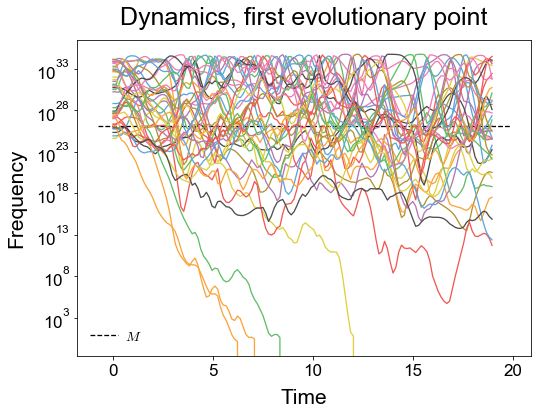

In [11]:
plt.figure()
plt.plot(exp_data['dt_list'][0]*np.arange(np.shape(exp_data['n_traj_eq'])[1]),N*exp_data['n_traj_eq'].T)
plt.yscale('log')
plt.hlines(y = N*np.exp(-M),xmin=-0.04*t_max,
           xmax=1.04*t_max,
           linestyle='--',color='k',label='$M$')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Dynamics, first evolutionary point',y=1.03)

In [12]:
t_max = exp_data['dt_list'][-1]*np.shape(exp_data['n_traj_f'])[1]

Text(0.5,1.03,'Dynamics, last evolutionary point')

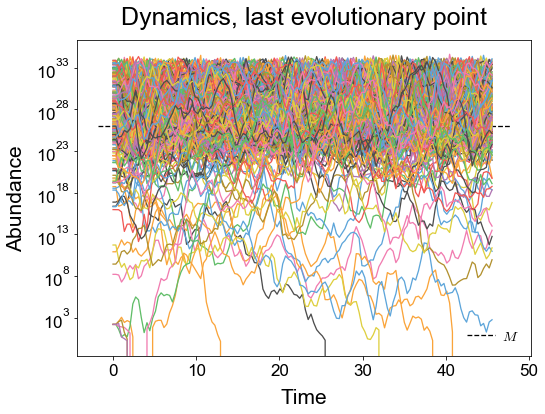

In [13]:
plt.figure()
plt.plot(exp_data['dt_list'][-1]*np.arange(np.shape(exp_data['n_traj_f'])[1]),N*exp_data['n_traj_f'].T)
plt.yscale('log')
plt.hlines(y = N*np.exp(-M),xmin=-0.04*t_max,
           xmax=1.04*t_max,
           linestyle='--',color='k',label='$M$')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Abundance')
plt.title('Dynamics, last evolutionary point',y=1.03)